## 1. Análise Exploratória

Importando bibliotecas iniciais

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

Lendo o dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vamos verificar algumas informações sobre o meu dataset e procurar por valores nulos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
np.sum(dataset.isnull())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Nenhum valor nulo. Demos sorte!

Vamos visualizar a distribuição das minhas amostras entre as duas classes de target.

In [5]:
dataset['Class'].value_counts(True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

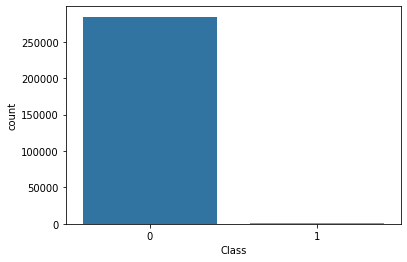

In [6]:
sns.countplot(dataset['Class'])

Perceba que o número de indivíduos na classe 1 (ou seja, que efetivamente ativaram o serviço de seguro) corresponde a menos do que 1% do meu dataset.

Agora, precisamos corrigir a diferença entre o número de indivíduos em cada classe. Do contrário, nosso modelo irá entregar uma falsa acurácia alta. Imagine que 90% de nossas amostras fossem da classe 0, um modelo que chutasse que todos são da classe 0 teria 90% de acurácia, mas não estaria fazendo nenhuma previsão sobre os meus dados. Por isso, precisamos trabalhar sobre um dataset dividido entre as duas classes. Verifique o que aconteceria do contrário:

In [7]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.9990519995786665


In [11]:
cm

array([[56830,    34],
       [   20,    78]])

Nosso modelo teve uma acurácia de 99.9%! Parece perfeito... mas o que deveríamos estar interessados em calcular é o recall de nosso modelo {acrescentar explicação sobre recall depois}, que é de apenas 70%. Essa tolerância depende muito da exigência de quem pede o serviço.

Vamos agora criar um novo dataset, com um número de amostras igual em ambas as classes da target

In [12]:
target_1 = dataset[dataset['Class'] == 1]
target_0 = dataset[dataset['Class'] == 0]
target_0_aux = target_0.sample(n=target_1.shape[0], random_state=42)
target_1_aux = target_1.copy()
reduced_dataset = pd.concat([target_0_aux, target_1_aux])
reduced_dataset = reduced_dataset.sample(frac=1).reset_index(drop=True)
reduced_dataset['Class'].value_counts(True)

1    0.5
0    0.5
Name: Class, dtype: float64

In [13]:
reduced_dataset.shape

(984, 31)

Quase mil linhas. Um número bom para trabalharmos.

Vamos visualizar agora a distribuição de nossas variáveis categóricas entre nossas classes.

In [14]:
def plot_distribution(df0, df1, label0, label1, feature_list):
    sns.set_style('darkgrid')

    for feature in feature_list:
        sns.distplot(df0[feature], hist=False,label=label0)
        sns.distplot(df1[feature], hist=False,label=label1)
        plt.show()

In [15]:
dataset_0 = reduced_dataset.loc[reduced_dataset['Class'] == 0]
dataset_1 = reduced_dataset.loc[reduced_dataset['Class'] == 1]
features = list(reduced_dataset.columns)
features.remove('Class')

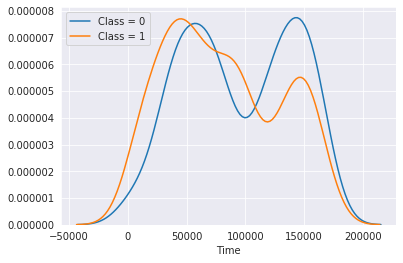

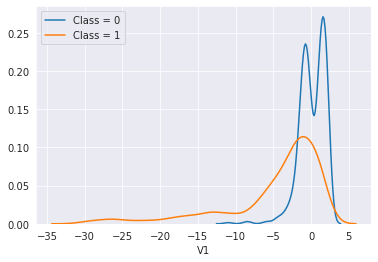

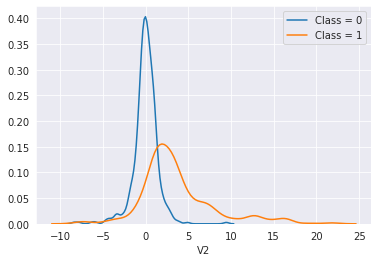

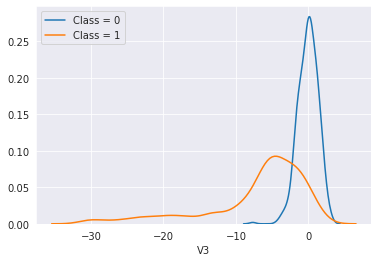

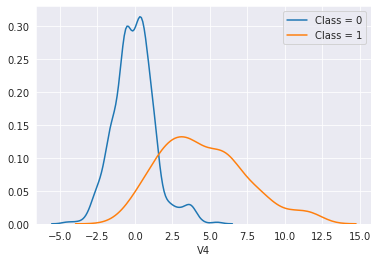

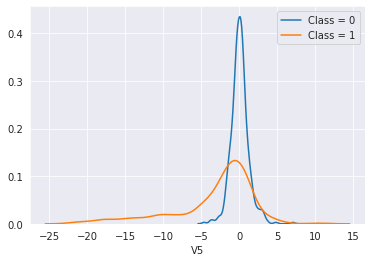

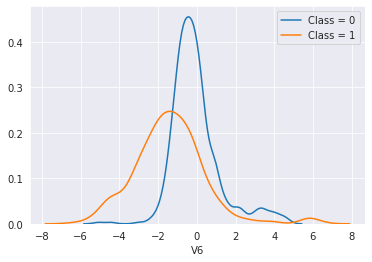

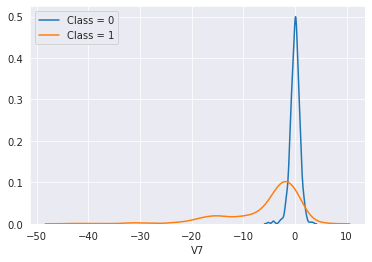

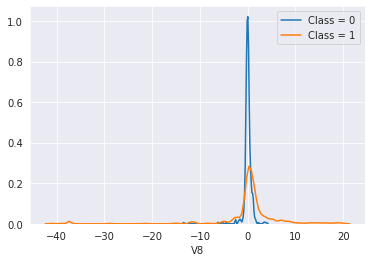

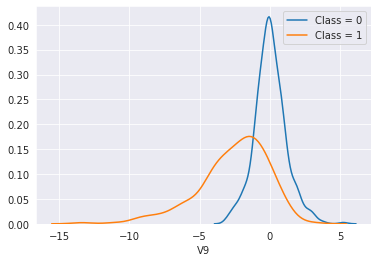

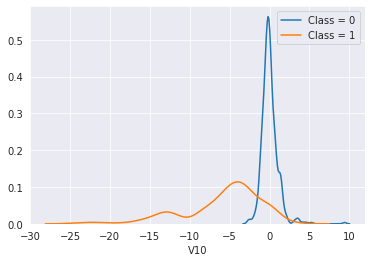

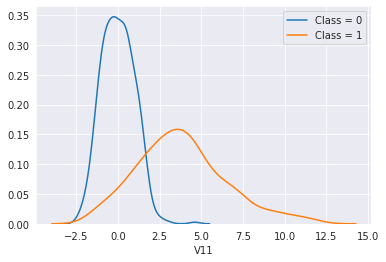

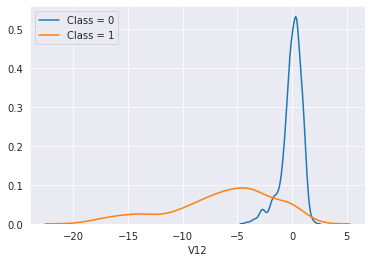

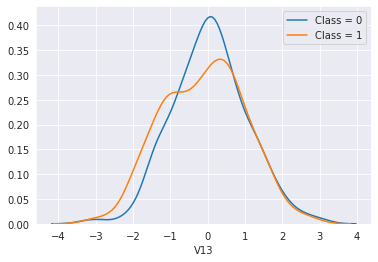

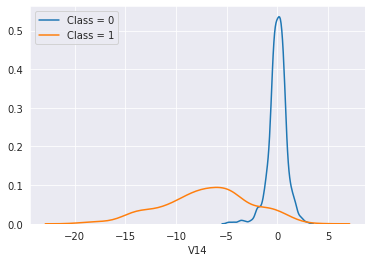

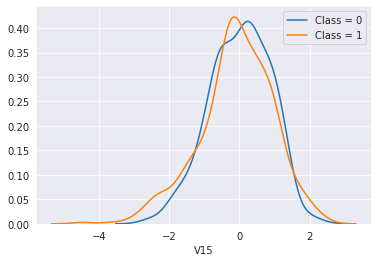

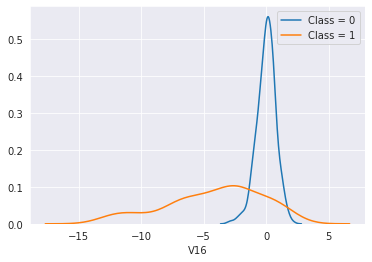

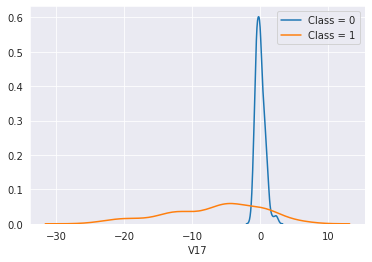

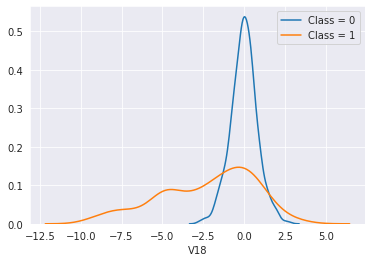

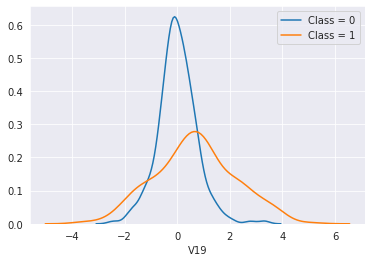

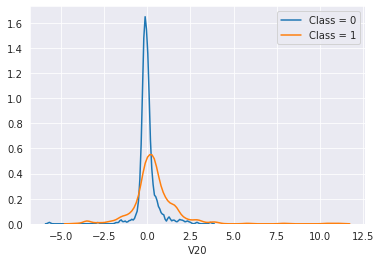

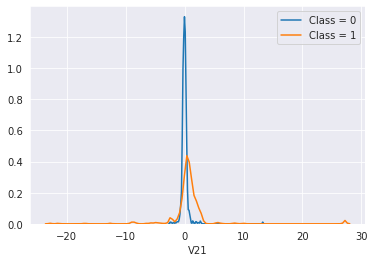

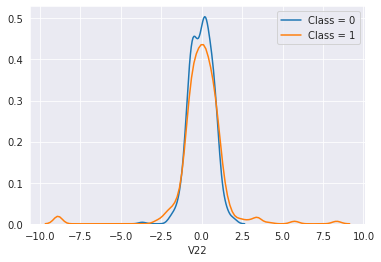

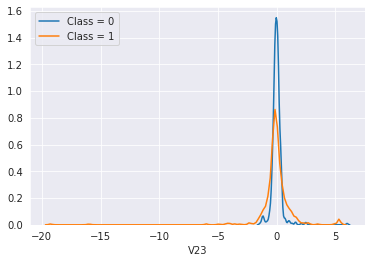

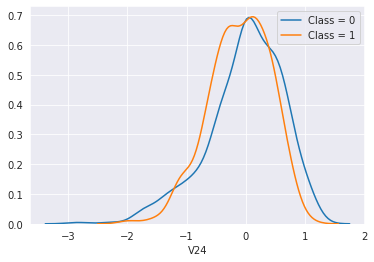

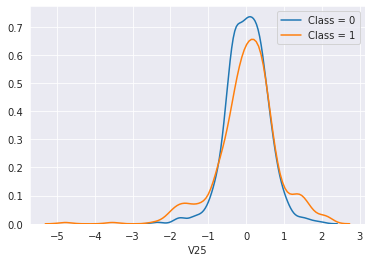

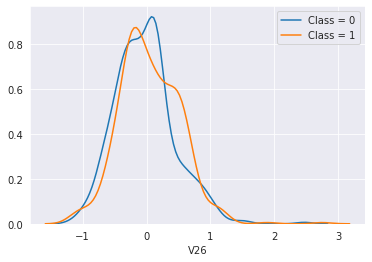

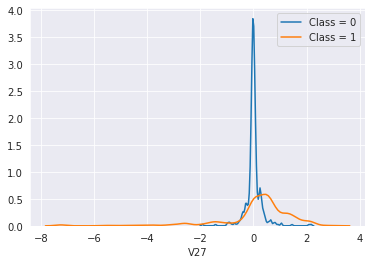

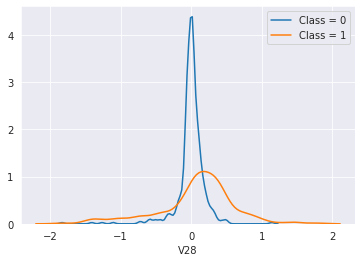

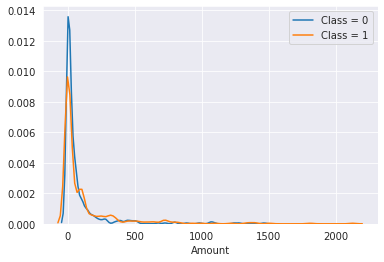

In [16]:
plot_distribution(dataset_0, dataset_1,'Class = 0', 'Class = 1', features)

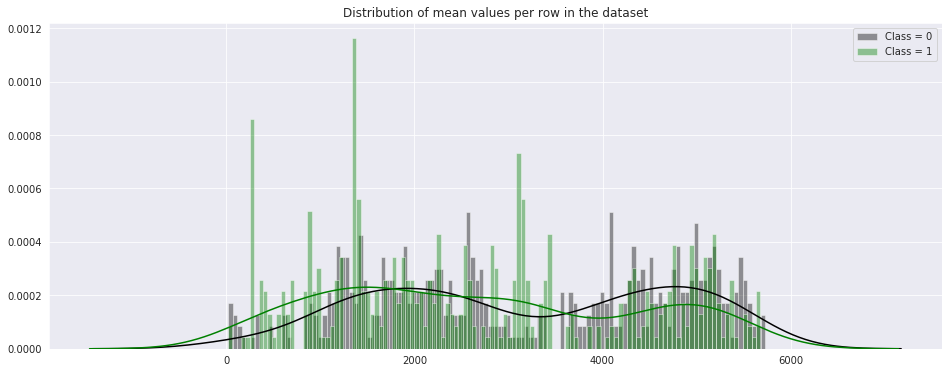

In [17]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the dataset")
sns.distplot(dataset_0[features].mean(axis=1),color="black", kde=True,bins=120, label='Class = 0')
sns.distplot(dataset_1[features].mean(axis=1),color="green", kde=True,bins=120, label='Class = 1')
plt.legend()
plt.show()

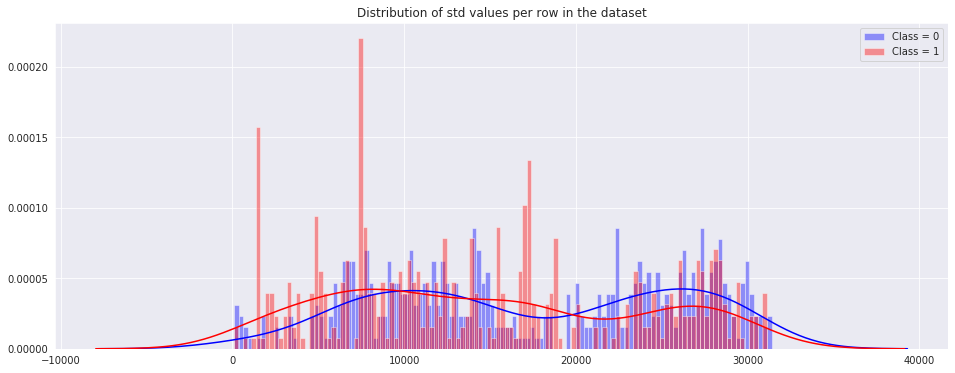

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the dataset")
sns.distplot(dataset_0[features].std(axis=1),color="blue", kde=True,bins=120, label='Class = 0')
sns.distplot(dataset_1[features].std(axis=1),color="red", kde=True,bins=120, label='Class = 1')
plt.legend()
plt.show()

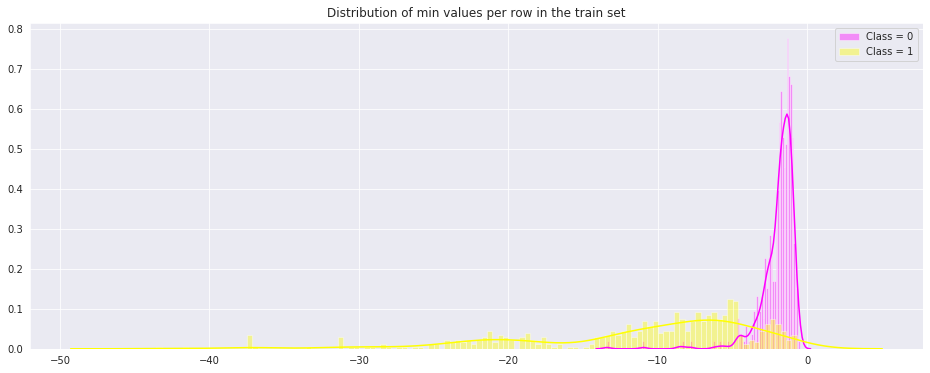

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(dataset_0[features].min(axis=1),color="magenta", kde=True,bins=120, label='Class = 0')
sns.distplot(dataset_1[features].min(axis=1),color="yellow", kde=True,bins=120, label='Class = 1')
plt.legend()
plt.show()

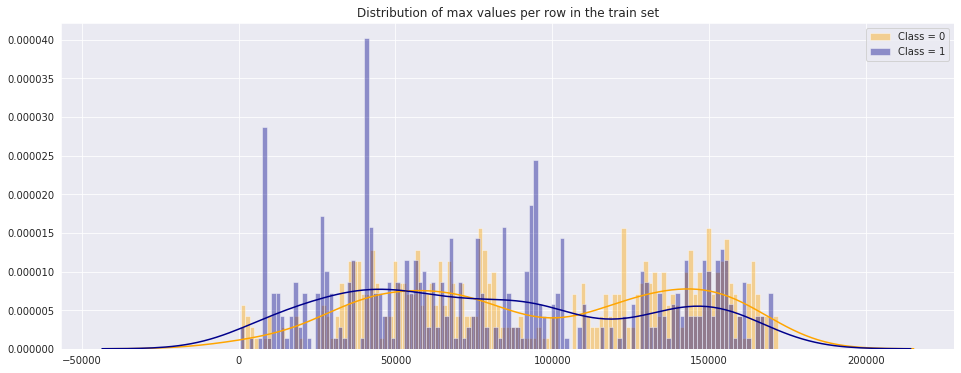

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row in the train set")
sns.distplot(dataset_0[features].max(axis=1),color="orange", kde=True,bins=120, label='Class = 0')
sns.distplot(dataset_1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='Class = 1')
plt.legend()
plt.show()

Vamos verificar agora a correlação entre as features:

In [21]:
correlations = reduced_dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations = correlations.drop([i for i in range(1,869,2)]).reset_index(drop=True)

Vamos verificar agora as 10 features com maior correlação e as 10 com menor, eliminando elementos repetidos:

In [22]:
print('Top 10 features com maior correlação:\n')
top_10 = correlations.tail(10)
top_10 = top_10.reset_index(drop=True)
top_10

Top 10 features com maior correlação:



,level_0,level_1,0
0,V1,V3,0.882471
1,V1,V7,0.889875
2,V7,V3,0.891757
3,V11,V14,0.895451
4,V12,V16,0.901792
5,V12,V11,0.901918
6,V18,V16,0.909009
7,V18,V17,0.941086
8,V17,V16,0.955257
9,V16,V17,0.955257


In [23]:
print('Top 10 features com menor correlação:\n')
less_10 = correlations.head(10)
less_10

Top 10 features com menor correlação:



,level_0,level_1,0
0,V25,V9,0.000276
1,V22,V23,0.000288
2,V25,V13,0.000560
3,V2,V24,0.001788
4,V2,V26,0.001802
5,V28,V12,0.002087
6,Amount,V22,0.002257
7,V10,V24,0.002696
8,V27,V17,0.002905
9,V15,V25,0.002986


Para que isso fique mais claro, vamos fazer um mapa de calor para as features e deixar isso mais claro:

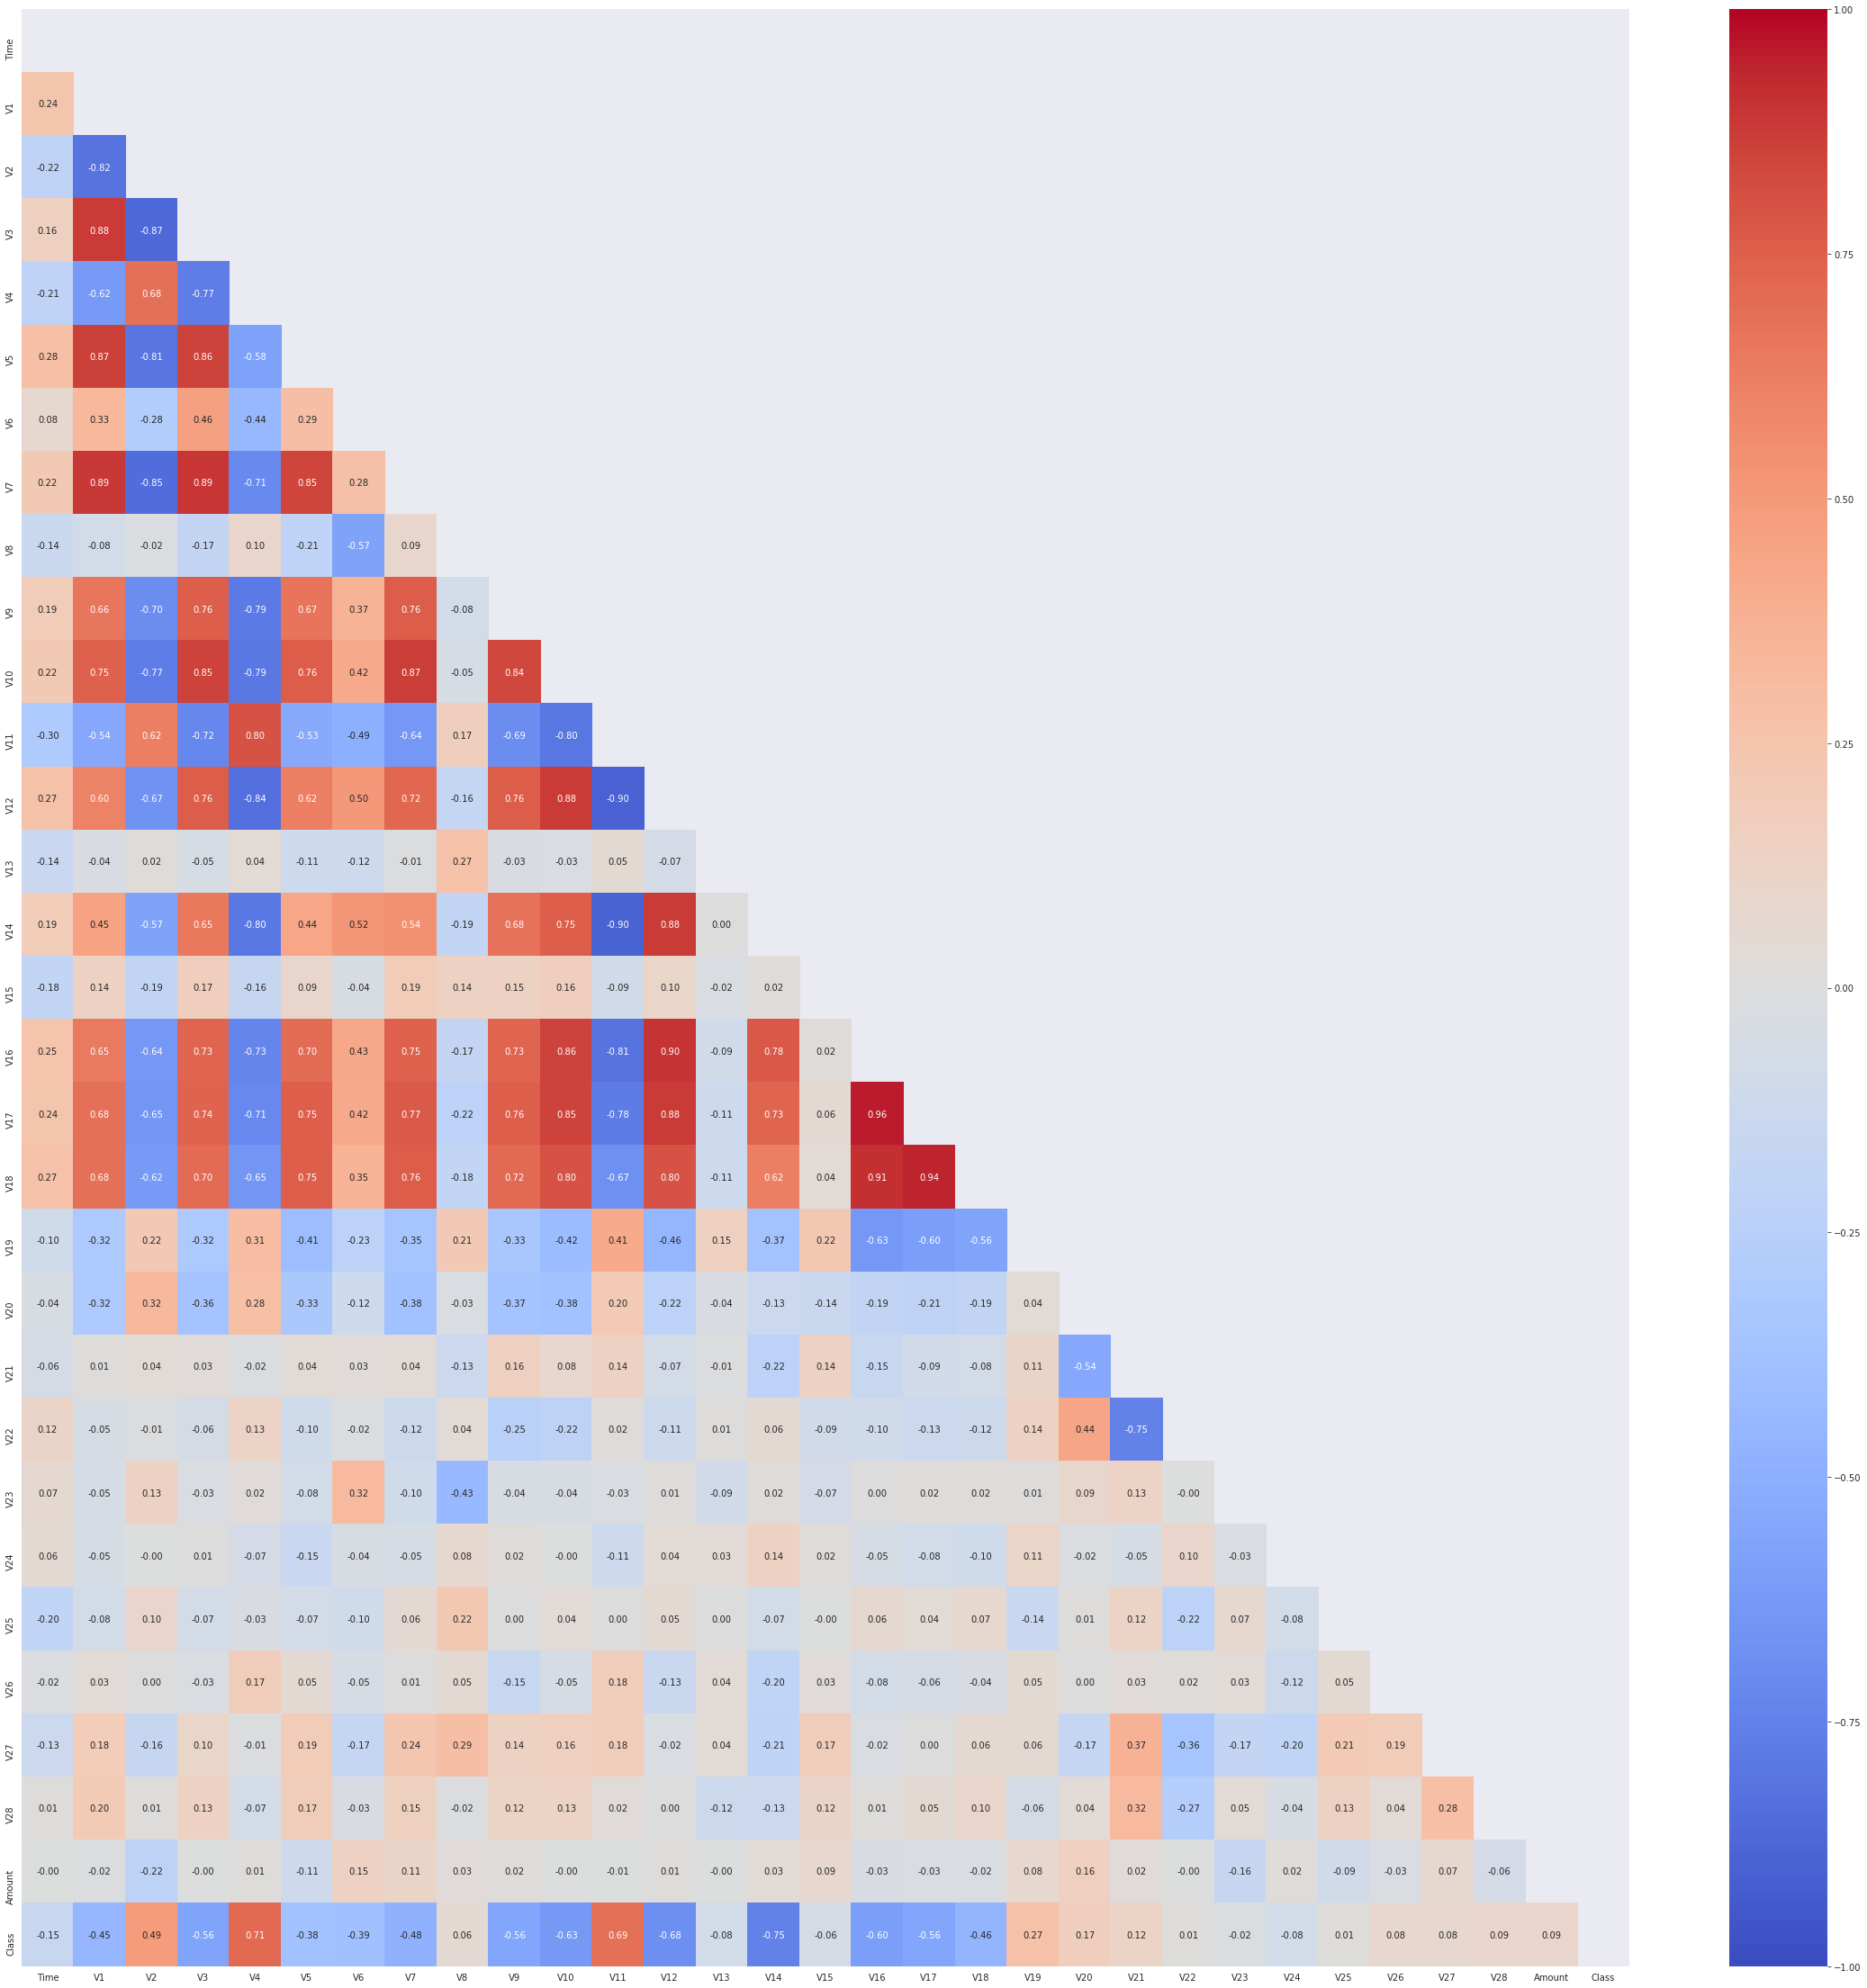

In [24]:
corrMatrix = reduced_dataset.corr()
index = corrMatrix.index
plt.figure(figsize=(40,40))
matrix = np.triu(corrMatrix)
g=sns.heatmap(corrMatrix,annot=True,vmin=-1,vmax=1,center=0,fmt='.2f',cmap='coolwarm',mask=matrix)

In [25]:
def plot_boxplot(df, target, feature_list):
    sns.set_style('darkgrid')

    for feature in feature_list:
        sns.boxplot(x=target, y=feature, data=df)
        plt.show()

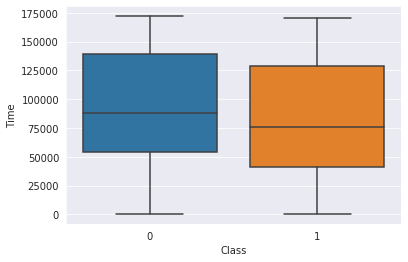

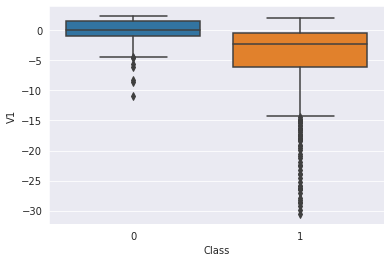

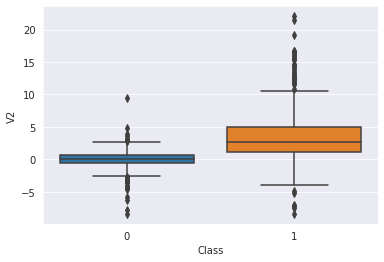

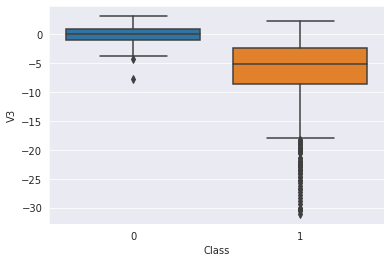

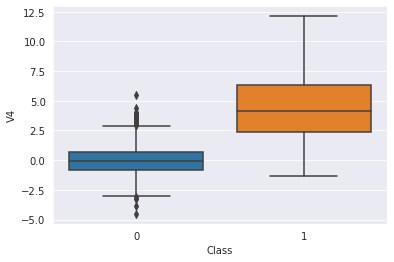

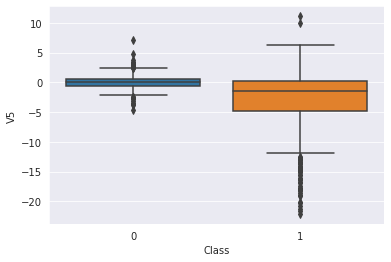

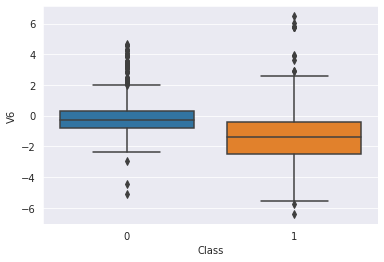

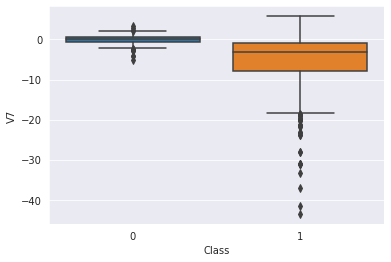

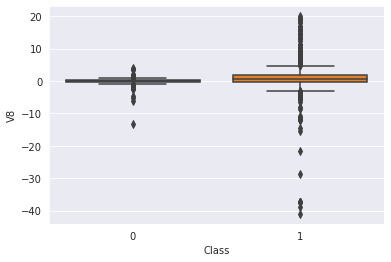

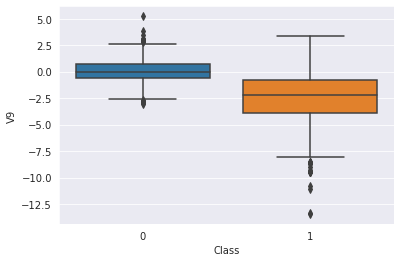

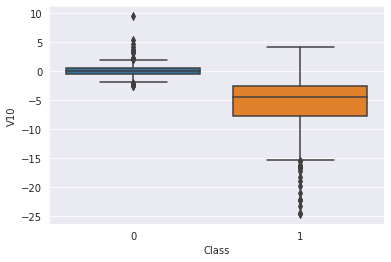

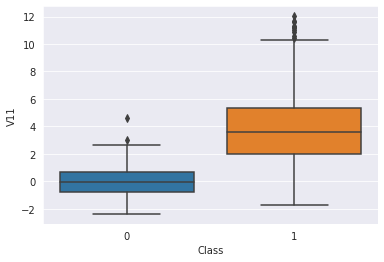

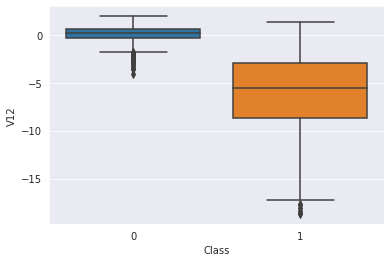

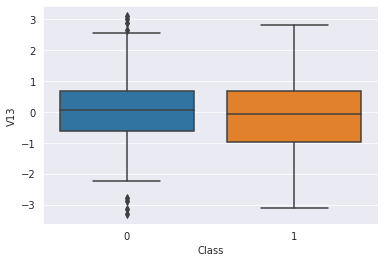

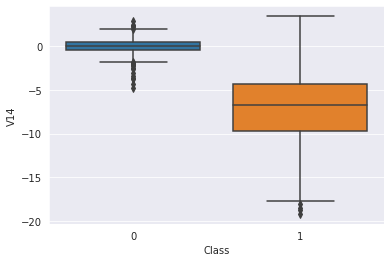

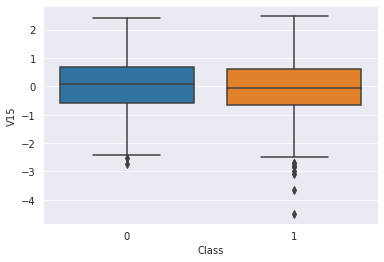

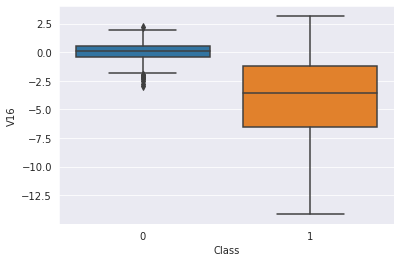

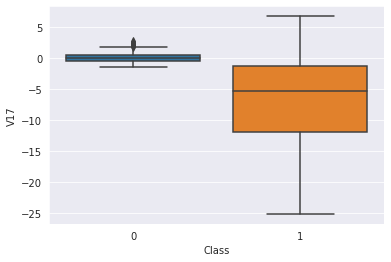

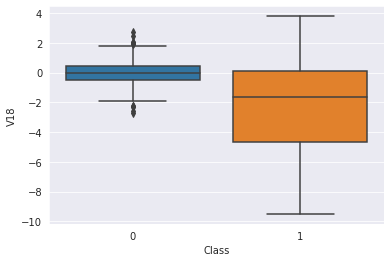

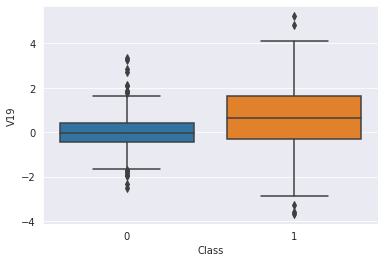

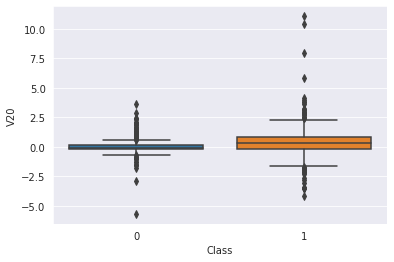

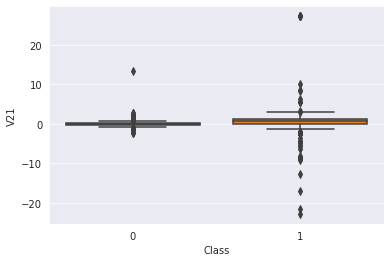

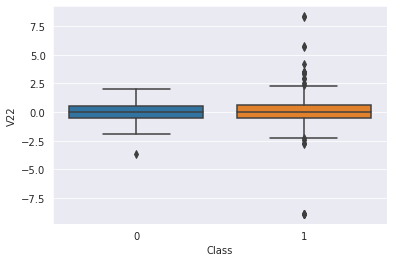

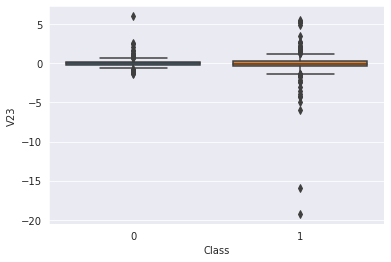

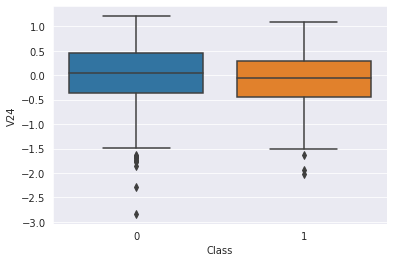

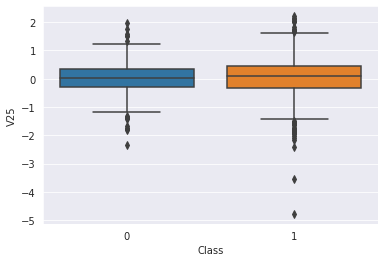

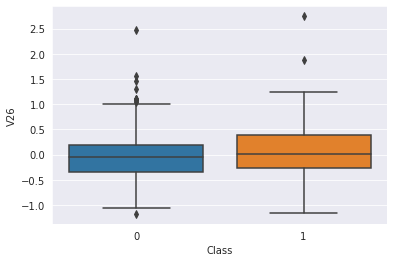

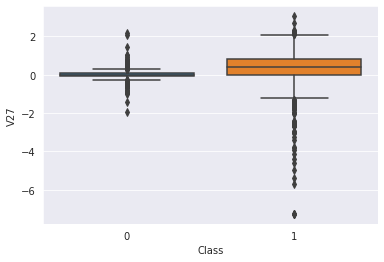

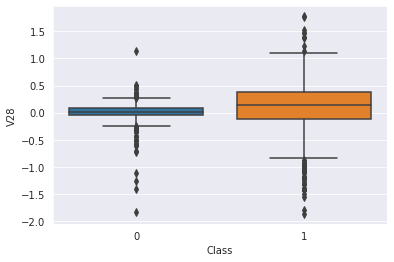

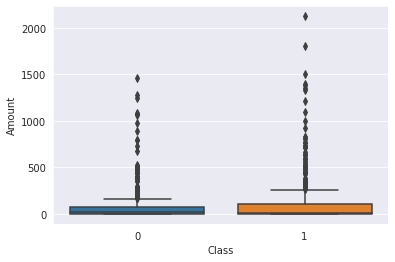

In [26]:
plot_boxplot(reduced_dataset, 'Class', features)

Vamos iniciar agora algumas previsões:

In [27]:
from sklearn.model_selection import train_test_split

X = reduced_dataset.drop(['Class'], axis=1)
y = reduced_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

print('\nAcurácia da Árvore de Decisão:', accuracy_score(y_test, y_pred_dt))
print('Recall da Árvore de Decisão:', recall_score(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('\nAcurácia da Regressão Logística:', accuracy_score(y_test, y_pred_lr))
print('Recall da Regressão Logística:', recall_score(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)


Acurácia da Árvore de Decisão: 0.9187817258883249
Recall da Árvore de Decisão: 0.9021739130434783

Acurácia da Regressão Logística: 0.9289340101522843
Recall da Regressão Logística: 0.8913043478260869


In [30]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

vote_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('dt', dt_clf)],
    voting='hard')
vote_clf.fit(X_train, y_train)
y_pred_vote = vote_clf.predict(X_test)

In [31]:
print('\nAcurácia do Voting Classifier:', accuracy_score(y_test, y_pred_vote))
print('Recall do Voting Classifier:', recall_score(y_test, y_pred_vote))
cm_vote = confusion_matrix(y_test, y_pred_vote)
print('\nAcurácia da Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Recall da Random Forest:', recall_score(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)


Acurácia do Voting Classifier: 0.934010152284264
Recall do Voting Classifier: 0.8804347826086957

Acurácia da Random Forest: 0.9441624365482234
Recall da Random Forest: 0.9130434782608695


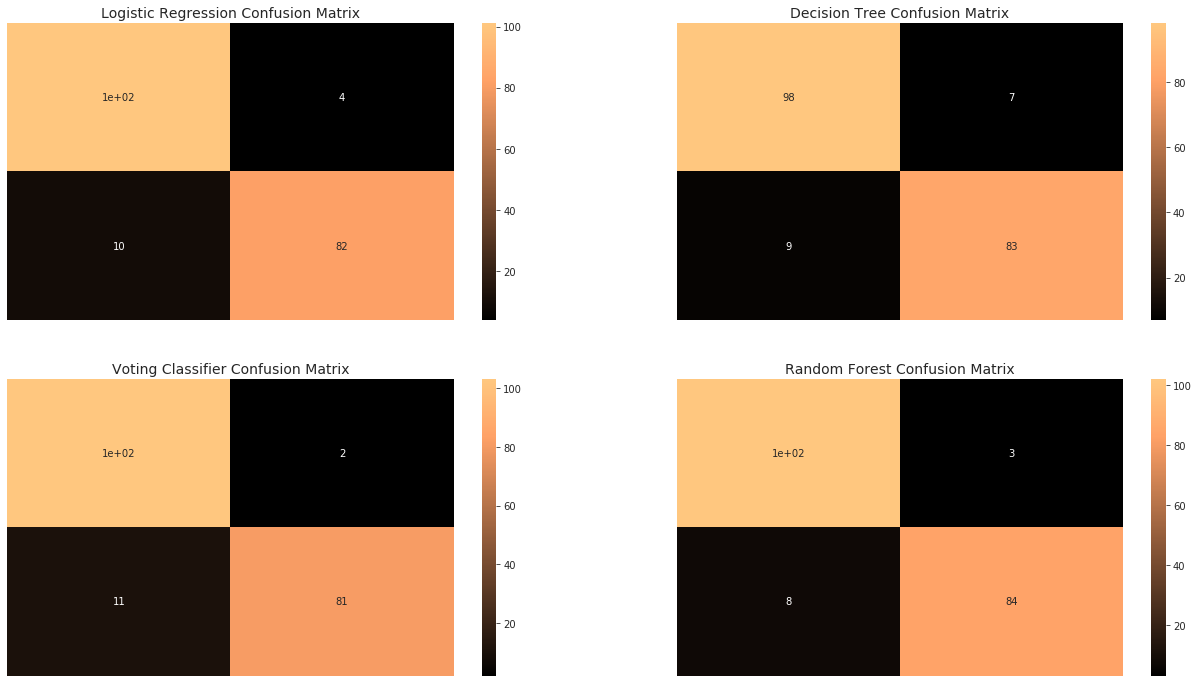

In [32]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(cm_lr, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_dt, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Decision Tree Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_vote, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Voting Classifier Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_rf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [33]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('Decision Tree:')
print(classification_report(y_test, y_pred_dt))

print('Voting Classifier:')
print(classification_report(y_test, y_pred_vote))

print('Random Forest:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       105
           1       0.95      0.89      0.92        92

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.92      0.90      0.91        92

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Voting Classifier:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       105
           1       0.98      0.88      0.93        92

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       

In [34]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt_clf, X_train, y_train, scoring='recall', cv=10)
lr_scores = cross_val_score(lr_clf, X_train, y_train, scoring='recall', cv=10)
rf_scores = cross_val_score(rf_clf, X_train, y_train, scoring='recall', cv=10)
vote_scores = cross_val_score(vote_clf, X_train, y_train, scoring='recall', cv=10)

In [35]:
def show_scores(scores):
    print("Scores:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())

print('\nDecision Tree scores:\n')
show_scores(dt_scores)

print('\nLogistic Regression scores:\n')
show_scores(lr_scores)

print('\nRandom Forest scores:\n')
show_scores(rf_scores)

print('\nVoting Classifier scores:\n')
show_scores(vote_scores)


Decision Tree scores:

Scores: [0.85  0.925 0.825 0.925 0.875 0.8   0.925 0.9   0.975 0.9  ]
Média: 0.89
Desvio padrão: 0.05024937810560445

Logistic Regression scores:

Scores: [0.85  0.925 0.9   0.925 0.85  0.825 0.95  0.925 0.975 0.9  ]
Média: 0.9025000000000001
Desvio padrão: 0.04534589286804265

Random Forest scores:

Scores: [0.825 0.925 0.925 0.9   0.875 0.85  0.95  0.925 0.975 0.9  ]
Média: 0.905
Desvio padrão: 0.04301162633521314

Voting Classifier scores:

Scores: [0.825 0.925 0.825 0.925 0.85  0.75  0.925 0.9   0.975 0.875]
Média: 0.8775000000000001
Desvio padrão: 0.06269968101992228


In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Decision Tree Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Voting Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/ne0/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

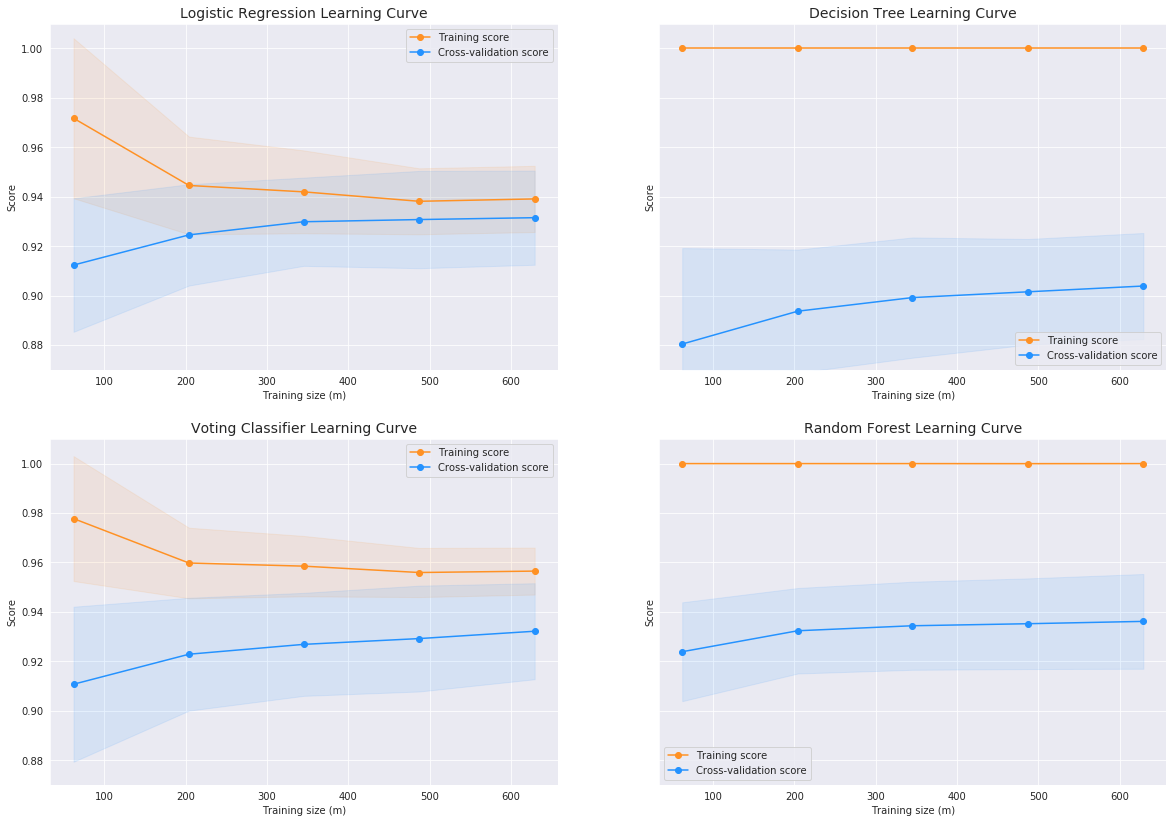

In [37]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(lr_clf, dt_clf, vote_clf, rf_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=-1)

In [38]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

lr_clf_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5,
                             method="decision_function")

dt_clf_pred = cross_val_predict(dt_clf, X_train, y_train, cv=5)

vote_clf_pred = cross_val_predict(vote_clf, X_train, y_train, cv=5)

rf_clf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)

In [39]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, lr_clf_pred))
print('Decision Tree: ', roc_auc_score(y_train, dt_clf_pred))
print('Voting Classifier: ', roc_auc_score(y_train, vote_clf_pred))
print('Random Forest: ', roc_auc_score(y_train, rf_clf_pred))

Logistic Regression:  0.9696770025839794
Decision Tree:  0.9073643410852713
Voting Classifier:  0.9309560723514211
Random Forest:  0.9369961240310077


In [40]:
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_train, lr_clf_pred)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_train, dt_clf_pred)
vote_fpr, vote_tpr, vote_threshold = roc_curve(y_train, vote_clf_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_clf_pred)


def graph_roc_curve_multiple(lr_fpr, lr_tpr, dt_fpr, dt_tpr, vote_fpr, vote_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, lr_clf_pred)))
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_clf_pred)))
    plt.plot(vote_fpr, vote_tpr, label='Voting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, vote_clf_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_clf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Falsos Positivos', fontsize=16)
    plt.ylabel('Verdadeiros Positivos', fontsize=16)
    plt.annotate('Mínimo ROC Score de 50% \n (O mínimo score desejável)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    

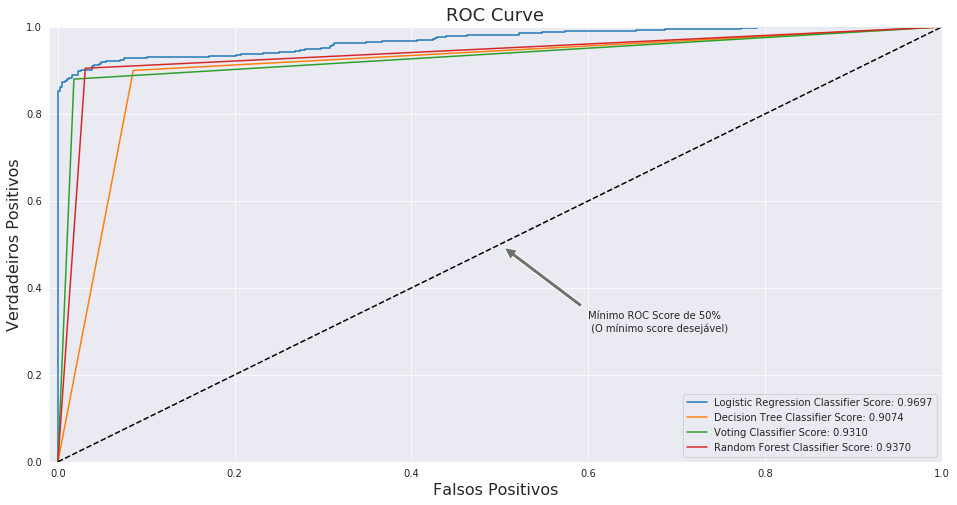

In [41]:
graph_roc_curve_multiple(lr_fpr, lr_tpr, dt_fpr, dt_tpr, vote_fpr, vote_tpr, rf_fpr, rf_tpr)
plt.show()

Vamos escolher um dos modelos para ser tunado. Tenha em mente que o processo de tunar o modelo é igual para ambos e faremos através do método de Random Search.

O modelo escolhido será RandomForest.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'criterion': ['gini', 'entropy'],
        'bootstrap': [True, False],
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=42)
rnd_search.fit(X_train, y_train)
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
final_clf = rnd_search.best_estimator_
final_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
print('Final Random Forest Classifer:\n')
print(classification_report(y_test, final_clf.predict(X_test)))

Final Random Forest Classifer:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       105
           1       0.97      0.91      0.94        92

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



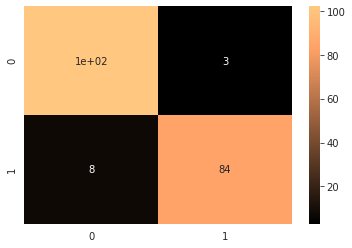

In [45]:
cm_final = confusion_matrix(y_test, final_clf.predict(X_test))
sns.heatmap(cm_final, annot=True, cmap=plt.cm.copper)
plt.show()

Vamos visualizar a importância de cada feature para o output final do meu modelo

In [46]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = features
feature_importance_df["Importance"] = final_clf.feature_importances_
feature_importance_df = feature_importance_df.sort_values(by="Importance").reset_index(drop=True)
feature_importance_df

,Feature,Importance
0,V26,0.004749
1,Time,0.005285
2,V1,0.005962
3,V24,0.006677
4,V25,0.007189
5,V15,0.007819
6,V5,0.008434
7,V22,0.008684
8,V27,0.009058
9,V13,0.010525


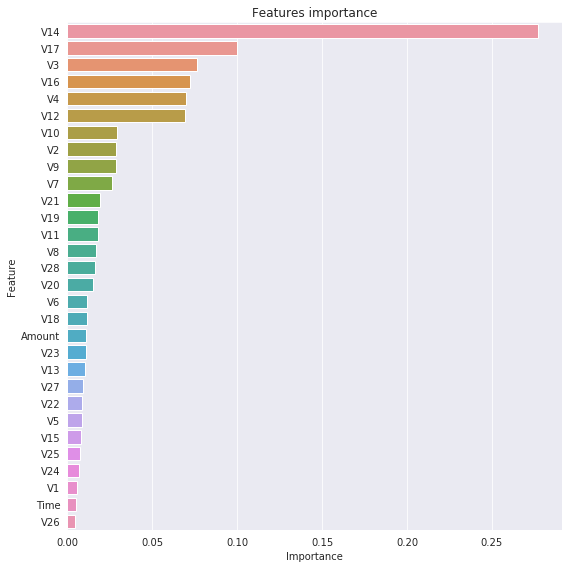

In [47]:
cols = (feature_importance_df[["Feature", "Importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="Importance", ascending=False).index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(8,8))
sns.barplot(x="Importance", y="Feature", data=best_features.sort_values(by="Importance",ascending=False))
plt.title('Features importance')
plt.tight_layout()

Você pode abaixo verificar uma das árvores usadas pelo nosso modelo

In [48]:
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [49]:
tree_graph_to_png(tree=final_clf.estimators_[0], feature_names=features, 
                  png_file_to_save='estimator0.png')

<img src="estimator0.png">